## Part I: Creating the Data Frame

The US Department of Agriculture publishes price estimates for fruits and vegetables online. The most recent estimates are based on 2018 data.

https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/

First I will extract the fresh fruit and vegetable data from the published Excel files, and combine the data into a single data frame. Each fruit and vegetable has it's own Excel file. 

In [2]:
# import necessary packages

import pandas as pd
import os
import os.path
import glob
import seaborn as sns
import numpy as np

In [3]:
def get_food_info(filenames):
    """
    Input: a list of file names containing the data to be extracted
    Output: a data frame that combines the data
    """
    
    food = []
    form = []
    price_per_lb = []
    yields = []
    lb_per_cup = []
    price_per_cup = []

    # read data from all of the files in the filename list and put data into lists
    for file in filenames:
        df = pd.read_excel(file)
        food_ind = df.columns[0]
        food.append(food_ind)
        form_ind = df.iloc[2,0]
        form.append(form_ind)
        pplb_ind = df.iloc[2,1] 
        price_per_lb.append(pplb_ind)
        yield_ind = df.iloc[2,3]
        yields.append(yield_ind)
        lbpc_ind = df.iloc[2,4]
        lb_per_cup.append(lbpc_ind)
        ppc_ind = df.iloc[2,6]
        price_per_cup.append(ppc_ind)
        
    # create data frame from lists
    df_all = pd.DataFrame(list(zip(food, form, price_per_lb, yields, lb_per_cup, price_per_cup)),
                         columns=['food', 'form', 'price_per_lb', 'yields', 'lb_per_cup', 'price_per_cup'])
    
    return df_all

In [4]:
# get list of fruit files
path1 = "C:\\Users\\Natalie\\fruits\\"
fruitnames = glob.glob(path1 + "\*.xlsx")

# get list of veg files
path2 = "C:\\Users\\Natalie\\veg\\"
vegnames = glob.glob(path2 + "\*.xlsx")

# get data frame for fruit and veg info
fruit_df = get_food_info(fruitnames)
veg_df = get_food_info(vegnames)

In [6]:
# fix strings in "form" column
fruit_df['form'] = fruit_df['form'].str.replace('Fresh1','Fresh')

# remove fruits that are not fresh
fruit_df = fruit_df[fruit_df.form == 'Fresh']

# fix strings in "food" column
fruit_df['food'] = fruit_df['food'].str.split('—').str[0]

# add new column "type" to indicate whether food is a fruit or vegetable
fruit_df['type'] = 'fruit'

fruit_df

,food,form,price_per_lb,yields,lb_per_cup,price_per_cup,type
0,Apples,Fresh,1.615534,0.90,0.242508,0.435312,fruit
1,Apricots,Fresh,3.087138,0.93,0.363763,1.207511,fruit
2,Bananas,Fresh,0.549417,0.64,0.330693,0.283889,fruit
5,Blueberries,Fresh,4.391108,0.95,0.319670,1.477586,fruit
6,Cantaloupe,Fresh,0.520794,0.51,0.374786,0.382718,fruit
7,Cherries,Fresh,3.213068,0.92,0.341717,1.193433,fruit
12,Grapefruit,Fresh,1.009797,0.49,0.462971,0.954095,fruit
13,Grapes,Fresh,2.235873,0.96,0.330693,0.770196,fruit
14,Honeydew melon,Fresh,0.825991,0.46,0.374786,0.672978,fruit
15,Kiwi,Fresh,2.181328,0.76,0.385809,1.107337,fruit


In [7]:
# fix strings in "food" column
veg_df['food'] = veg_df['food'].str.split('—').str[0]

# add new column "type" to indicate whether food is a fruit or vegetable
veg_df['type'] = 'vegetable'

# remove canned foods
veg_df = veg_df[veg_df.form != 'Canned1']
veg_df = veg_df[veg_df.form != 'Canned1,2']
veg_df = veg_df[veg_df.form != 'Dried1']

veg_df

,food,form,price_per_lb,yields,lb_per_cup,price_per_cup,type
0,Acorn squash,Fresh1,1.119309,0.458554,0.451948,1.103183,vegetable
1,Artichoke,Fresh1,2.363733,0.375309,0.385809,2.429865,vegetable
2,Asparagus,Fresh1,3.075611,0.493835,0.396832,2.471473,vegetable
3,Avocados,Fresh1,2.225544,0.740753,0.31967,0.960428,vegetable
7,Broccoli,Fresh,,,,NaN,vegetable
8,Brussels sprouts,Fresh1,2.962093,1.06,0.341717,0.954902,vegetable
9,Butternut squash,Fresh1,1.292011,0.714,0.451948,0.817817,vegetable
10,Cabbage,Fresh green cabbage1,0.623871,0.778797,0.330693,0.264909,vegetable
11,Carrots,Fresh,NaN,NaN,NaN,NaN,vegetable
12,Cauliflower,Fresh1,,,,NaN,vegetable



Most files have one "Fresh" row. However some files have multiple rows under "Fresh", which is why there are Null values for some of the vegetables. For instance, the "spinach" files has two rows under the "Fresh" row: one row for "boiled" and one row for "raw". For files like these, I will choose one row under "Fresh" to extract the data from.

In [8]:
# Get info for vegetables that currently have Null values in dataframe,
# then insert data into vegetable data frame

path = "C:\\Users\\Natalie\\veg\\broccoli.xlsx"
br_df = pd.read_excel(path)
veg_df.iloc[4,2] = br_df.iloc[4,1]
veg_df.iloc[4,3] = br_df.iloc[4,3]
veg_df.iloc[4,4] = br_df.iloc[4,4]
veg_df.iloc[4,5] = br_df.iloc[4,6]

path = "C:\\Users\\Natalie\\veg\\carrots.xlsx"
car_df = pd.read_excel(path)
veg_df.iloc[8,2] = car_df.iloc[4,1]
veg_df.iloc[8,3] = car_df.iloc[4,3]
veg_df.iloc[8,4] = car_df.iloc[4,4]
veg_df.iloc[8,5] = car_df.iloc[4,6]

path = "C:\\Users\\Natalie\\veg\\cauliflower.xlsx"
cl_df = pd.read_excel(path)
veg_df.iloc[9,2] = cl_df.iloc[4,1]
veg_df.iloc[9,3] = cl_df.iloc[4,3]
veg_df.iloc[9,4] = cl_df.iloc[4,4]
veg_df.iloc[9,5] = cl_df.iloc[4,6]

path = "C:\\Users\\Natalie\\veg\\celery.xlsx"
ce_df = pd.read_excel(path)
veg_df.iloc[10,2] = ce_df.iloc[3,1]
veg_df.iloc[10,3] = ce_df.iloc[3,3]
veg_df.iloc[10,4] = ce_df.iloc[3,4]
veg_df.iloc[10,5] = ce_df.iloc[3,6]

path = "C:\\Users\\Natalie\\veg\\lettuce_romaine.xlsx"
le_df = pd.read_excel(path)
veg_df.iloc[18,2] = le_df.iloc[3,1]
veg_df.iloc[18,3] = le_df.iloc[3,3]
veg_df.iloc[18,4] = le_df.iloc[3,4]
veg_df.iloc[18,5] = le_df.iloc[3,6]

path = "C:\\Users\\Natalie\\veg\\mushrooms.xlsx"
mu_df = pd.read_excel(path)
veg_df.iloc[20,2] = mu_df.iloc[3,1]
veg_df.iloc[20,3] = mu_df.iloc[3,3]
veg_df.iloc[20,4] = mu_df.iloc[3,4]
veg_df.iloc[20,5] = mu_df.iloc[3,6]

path = "C:\\Users\\Natalie\\veg\\spinach.xlsx"
sp_df = pd.read_excel(path)
veg_df.iloc[27,2] = sp_df.iloc[4,1]
veg_df.iloc[27,3] = sp_df.iloc[4,3]
veg_df.iloc[27,4] = sp_df.iloc[4,4]
veg_df.iloc[27,5] = sp_df.iloc[4,6]

path = "C:\\Users\\Natalie\\veg\\tomatoes.xlsx"
to_df = pd.read_excel(path)
veg_df.iloc[30,2] = to_df.iloc[5,1]
veg_df.iloc[30,3] = to_df.iloc[5,3]
veg_df.iloc[30,4] = to_df.iloc[5,4]
veg_df.iloc[30,5] = to_df.iloc[5,6]

In [9]:
# drop "mixed vegetables" row
veg_df = veg_df[veg_df.food != 'Mixed vegetables']

# replace strings
veg_df['form'] = veg_df['form'].replace({'Fresh1':'Fresh', 'Fresh green cabbage1':'Fresh', 
                                         'Fresh, consumed with peel1':'Fresh'})
# combine the fruit and vegetable dataframes
fresh_df = pd.concat([fruit_df, veg_df])

fresh_df

,food,form,price_per_lb,yields,lb_per_cup,price_per_cup,type
0,Apples,Fresh,1.615534,0.9,0.242508,0.435312,fruit
1,Apricots,Fresh,3.087138,0.93,0.363763,1.207511,fruit
2,Bananas,Fresh,0.549417,0.64,0.330693,0.283889,fruit
5,Blueberries,Fresh,4.391108,0.95,0.31967,1.477586,fruit
6,Cantaloupe,Fresh,0.520794,0.51,0.374786,0.382718,fruit
7,Cherries,Fresh,3.213068,0.92,0.341717,1.193433,fruit
12,Grapefruit,Fresh,1.009797,0.49,0.462971,0.954095,fruit
13,Grapes,Fresh,2.235873,0.96,0.330693,0.770196,fruit
14,Honeydew melon,Fresh,0.825991,0.46,0.374786,0.672978,fruit
15,Kiwi,Fresh,2.181328,0.76,0.385809,1.107337,fruit


In [10]:
# make sure all columns with numbers are numeric data type

fresh_df['price_per_lb'] = fresh_df['price_per_lb'].astype(float)
fresh_df['yields'] = fresh_df['yields'].astype(float)
fresh_df['lb_per_cup'] = fresh_df['lb_per_cup'].astype(float)

fresh_df = fresh_df.reset_index()

In [172]:
# write data frame to csv file
fresh_df.to_csv('fresh.csv', index = False)

## Part II: Exploratory Data Analysis

### What kinds of foods are the most expensive? What kinds are the least expensive?

Text(0.5, 1.0, 'Price per Pound in Dollars for Produce Items')

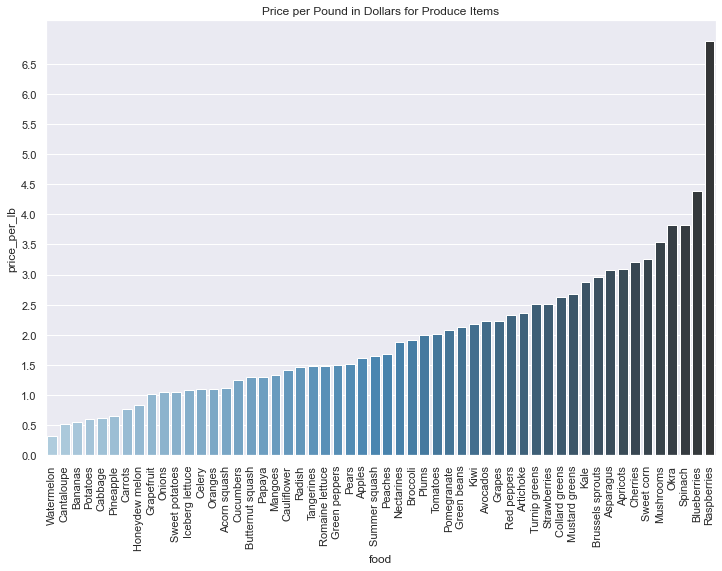

In [178]:
# create plot to show price per pound for each item

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.barplot(data=fresh_df, x='food', y='price_per_lb', palette='Blues_d', order=fresh_df.sort_values('price_per_lb').food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticks(np.arange(0, 7, .5))
ax.set_title('Price per Pound in Dollars for Produce Items')

Text(0.5, 1.0, 'Price per Cup in Dollars for Produce Items')

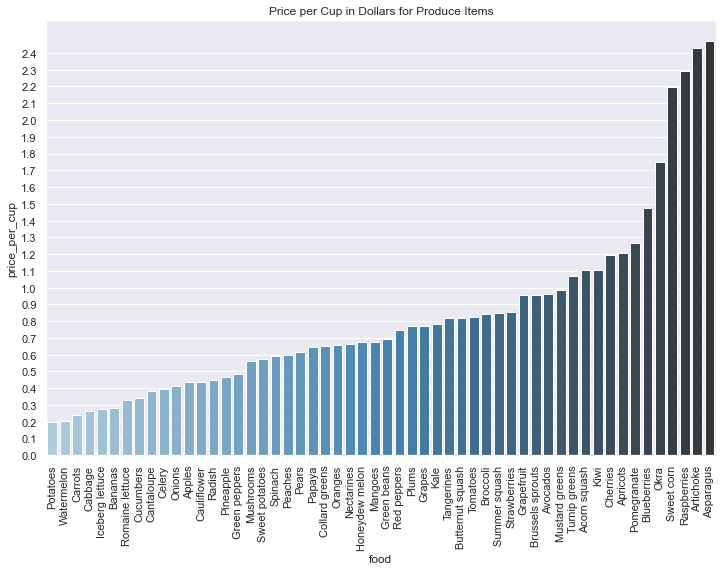

In [179]:
# create plot to show price per cup for each item

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.barplot(data=fresh_df, x='food', y='price_per_cup', palette='Blues_d', order=fresh_df.sort_values('price_per_cup').food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticks(np.arange(0, 2.5, .1))
ax.set_title('Price per Cup in Dollars for Produce Items')

The "Price per Pound" and "Price per Cup" plots show that the most expensive items are Raspberries, Blueberries, Asparagus, Artichoke, Spinach, Sweet Corn, and Okra. The least expensive items are Potatoes, Watermelon, Canteloupe, Bananas, Cabbage, and Carrots. The price per pound for raspberries (\\$6.8) is over 3 times the average price per pound for all items (\\$1.96).   

In [11]:
fresh_df.describe()

,price_per_lb,yields,lb_per_cup,price_per_cup
count,54.000000,54.000000,54.000000,54.000000
mean,1.961637,0.794667,0.329060,0.827520
std,1.174529,0.180903,0.066118,0.542686
min,0.316639,0.375309,0.154324,0.196870
25%,1.102668,0.711000,0.278334,0.452173
50%,1.658989,0.820000,0.330693,0.685120
75%,2.508440,0.937500,0.363763,0.959047
max,6.877702,1.160000,0.462971,2.471473


### How do the price distributions compare for fruits and vegetables?

Text(0.5, 1.0, 'Histograms for Fruit and Vegetable Prices per Pound in Dollars')

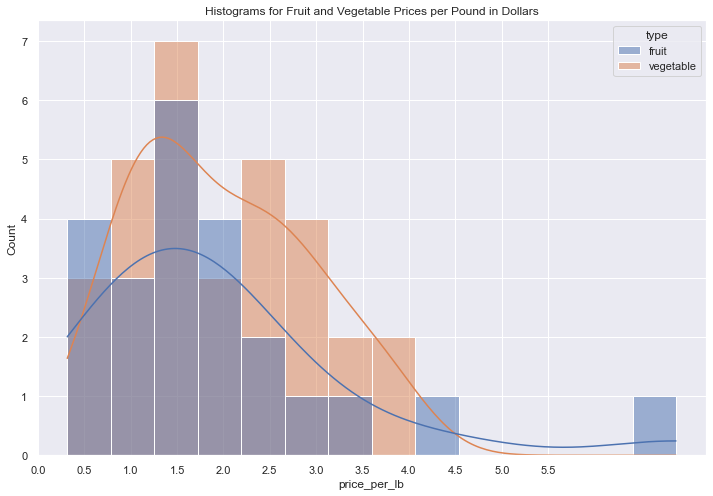

In [61]:
# create histograms for food prices per pound

ax = sns.histplot(data=fresh_df, x='price_per_lb', hue='type', bins=14, kde=True)
ax.set_xticks(np.arange(0, 6, .5))
ax.set_title('Histograms for Fruit and Vegetable Prices per Pound in Dollars')

Text(0.5, 1.0, 'Histograms for Fruit and Vegetable Prices per Cup in Dollars')

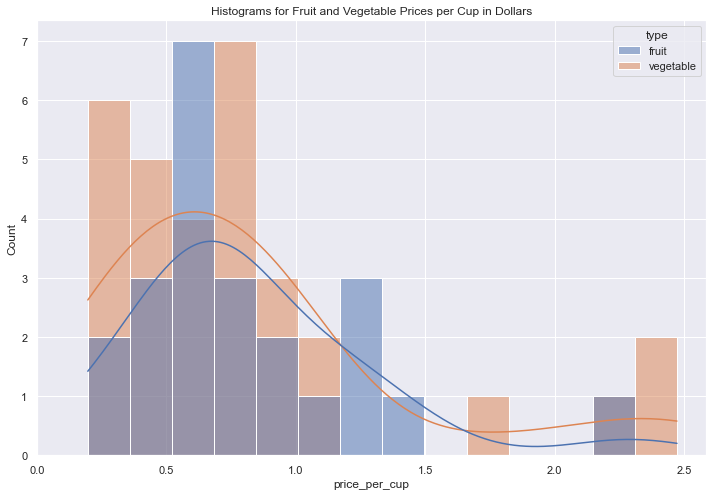

In [54]:
# create histograms for food prices per cup

ax = sns.histplot(data=fresh_df, x='price_per_cup', hue='type', bins=14, kde=True)
ax.set_xticks(np.arange(0, 3, .5))
ax.set_title('Histograms for Fruit and Vegetable Prices per Cup in Dollars')

From looking at the distributions for the prices per pound, it appears that the vegetables are slightly more expensive. There are a higher proportion of vegetables that are past the $2 point. The shapes of the fruit and vegetable distributions are more similar to each other when looking at price per cup.

Text(0.5, 1.0, 'Boxplots for Fruit and Vegetable Prices per Pound in Dollars')

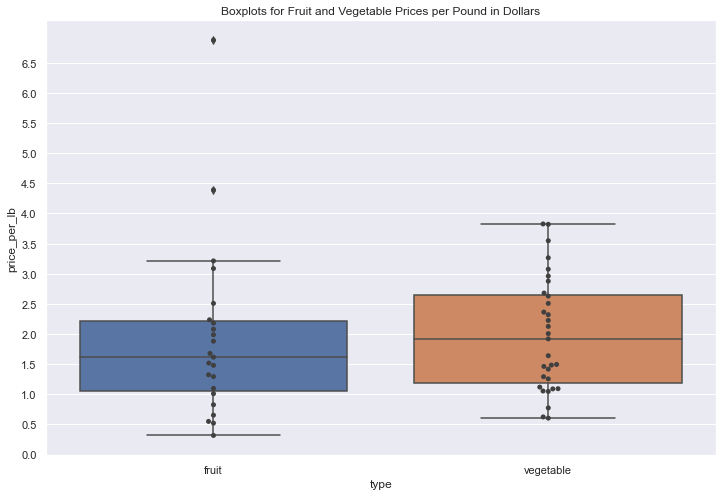

In [199]:
# create boxplots for prices per pound

ax = sns.boxplot(data=fresh_df, x='type', y='price_per_lb')
ax.set_yticks(np.arange(0,7,.5))
ax = sns.swarmplot(data=fresh_df, x='type', y='price_per_lb', color='.25')
ax.set_title('Boxplots for Fruit and Vegetable Prices per Pound in Dollars')

Text(0.5, 1.0, 'Boxplots for Fruit and Vegetable Prices per Cup in Dollars')

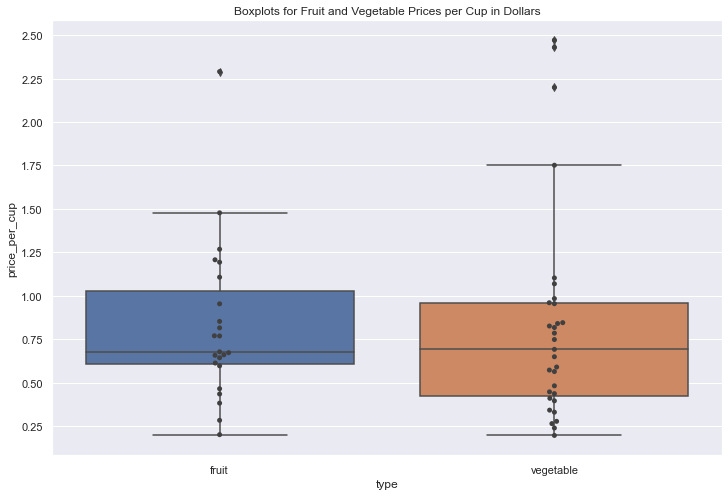

In [13]:
# create boxplots for prices per cup

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.boxplot(data=fresh_df, x='type', y='price_per_cup')
ax.set_yticks(np.arange(0, 3, .25))
ax = sns.swarmplot(data=fresh_df, x='type', y='price_per_cup', color=".25")
ax.set_title('Boxplots for Fruit and Vegetable Prices per Cup in Dollars')

The median price per pound is slightly higher for vegetables than it is for fruits, while the median price per cup is similar for both fruits and vegetables. We do not have enough evidence to conclude that the two distributions are truly different. The Kolmogorov-Smirnov test can compare two samples and see if they come from the same distributions - I will use the test to compare the fruit and vegetable price distributions. 

In [71]:
from scipy.stats import ks_2samp

# make new dataframes for fruits and vegetables
fruit_df = fresh_df[fresh_df.type == 'fruit']
veg_df = fresh_df[fresh_df.type == 'vegetable']

# two sample Kolmogorov-Smirnov test
ks_2samp(fruit_df['price_per_lb'], veg_df['price_per_lb'])

KstestResult(statistic=0.1697054698457223, pvalue=0.7629212740745317)

Because the p-value is high (>0.05), the null hypothesis that the two distributions are the same can not be rejected. We can not conclude that the distributions for fruit and vegetable prices are different. 

### Which foods are the best value for the price?

To answer this question, we can use the "yields" column. The yield is referring to the percentage of the item's weight that is edible. For example, the "yield" value for Apples is 0.9, which means that after being prepared for consumption, 90% of the apples' weight is retained. 

To calculate a new price value, I will divide each item's price per pound by it's yield. 

In [37]:
fresh_df['price/yield'] = fresh_df['price_per_lb'] / fresh_df['yields']

Text(0.5, 1.0, 'Price/Yield for Produce Items')

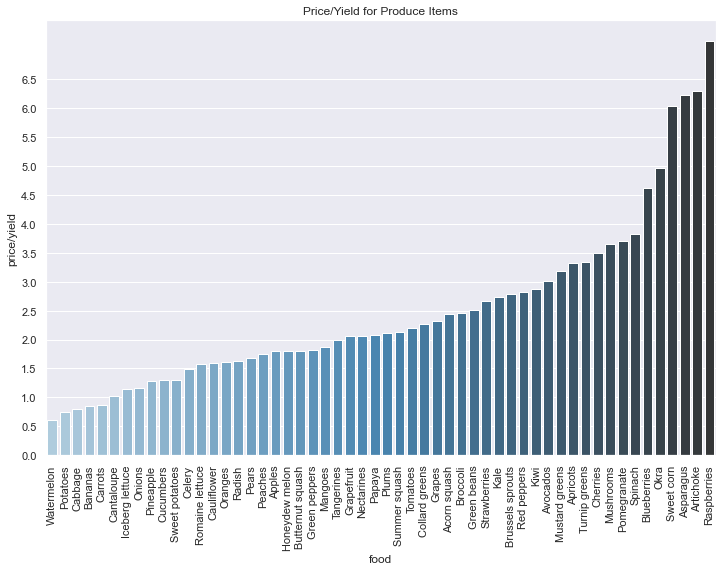

In [39]:
ax = sns.barplot(data=fresh_df, x='food', y='price/yield', palette='Blues_d', order=fresh_df.sort_values('price/yield').food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticks(np.arange(0, 7, .5))
ax.set_title('Price/Yield for Produce Items')

The food prices remain similar after accounting for yield. The five items with the lowest prices after accounting for yield are watermelon, potatoes, cabbage, bananas, and carrots. Three items that increase their rank in terms of lowest price after accounting for yield are bananas, canteloupe, and onions.

Text(0.5, 1.0, 'Relationship between price/yield and Price per Pound')

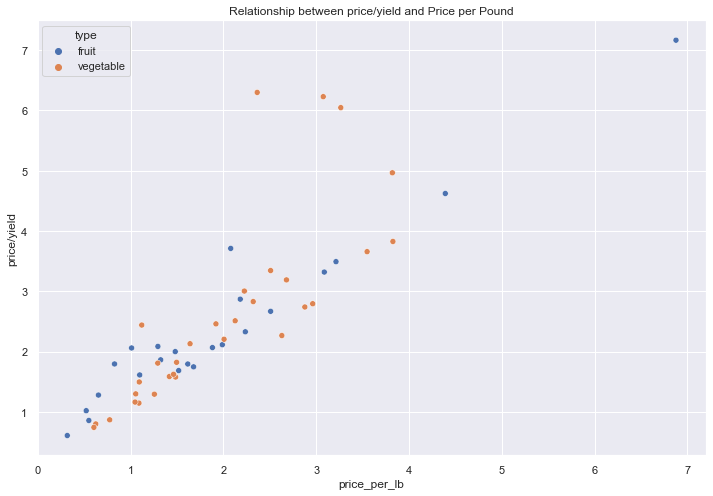

In [62]:
# create scatterplot
ax = sns.scatterplot(x=fresh_df['price_per_lb'], y=fresh_df['price/yield'], hue=fresh_df['type'])
ax.set_title('Relationship between price/yield and Price per Pound')

After accounting for yield, the cost of most items remain similar. However, in the scatterplot above we can see three vegetables that have a signifcantly higher cost after accounting for yield; these vegetables are sweet corn (yield = .54), asparagus (yield  = .49), and artichoke (yield = .375).

In the next part of this project, nutrition information will be extracted from the USDA Food Composition Database API. This can help provide a more thorough answer to the question "Which foods are the best value for the price?"